In [23]:
### Importação de bibliotecas

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.decomposition import PCA
##from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier    # MLP

from xgboost import XGBClassifier

from hypopt import GridSearch

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source    

from plot_metric.functions import BinaryClassification

%matplotlib inline

In [2]:
# Instalação de pacotes
!pip install imblearn
!pip install ipywidgets
!pip3 install pydot
!pip3 install graphviz
!pip install plot-metric
!pip install hypopt

In [3]:
!pip install xgboost

# Etapas do projeto
- Coleta de dados
- Pre-processamento
- Feature Engineering
- Analise de Dados
- Interações entre variáveis
- Criação de modelos
- Validação de modelos
- Apresentação dos resultados

## 1. Coleta de dados

In [24]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [25]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


- Os dados de treino e teste serão concatenados para análise e tratamento inicial dos dados

In [26]:
df = pd.concat([df_train,df_test],ignore_index=True)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


## 2. Pre-processamento

- Os dados de treino e testes foram concatenados para tratá-los igualmente.

### Resumo:

- Dados Ausentes: Sim, Excluido dados inválidos referente a classe "Response" 
- Dados duplicados: Não.
-  Colunas categóricas Gender, Vehicle_Age e Vehicle_Damage alteradas para numéricas.
- Criação de um dataframe exclusivo para análise de dados, alteração das Previously_Insured e Driving_License para categóricas a fim de facilitar visualização em gráficos
- Novas features: As features categóricas Region_Code e Policy_Sales_Channel foram quebradas em novas colunas representando vetores características
- Classes desbalanceadas: Efetuado técnica de undersampling.
- Padronização: os dados foram padronizados com StandardScaler() nas Pipelines criadas durante a avaliação dos modelos de ML


### 2.1 Relatório Pandas Profiling
- Análise exploratória dos dados

In [27]:
##pandas_profiling.ProfileReport(df)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 46.5+ MB


### 2.2 Remoção de valores nulos
- Ausência de valores nulos

In [29]:
df.isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

### 2.3 Remoção valores inválidos
- Remoção valores inválidos na coluna "Response" que corresponde a classe do dataframe.

In [30]:
np.unique(df['Response'])

array([ 0.,  1., nan, ..., nan, nan, nan])

In [31]:
df = df[(df['Response'] == 1) | (df['Response'] == 0)]
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0.0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0.0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0.0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0.0


In [32]:
rows, columns = df.shape
rows

381109

### 2.4 Remoção valores duplicados
- Não há registros duplicados conforme verificado na etapa 2.1

In [33]:
rows, columns = df.shape
rows

381109

In [34]:
df = df.drop_duplicates()
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [35]:
rows, columns = df.shape
rows

381109

### 2.5 Remoção de outliers
-  Há outliers na variável "Annual_Premium" o que fazer com elas? Considerá-las para nosso treinamento uma vez que o valor do seguro depende de uma decisão do negócio ou usar a técnica de remoção de valores extremos? mean - 2 sigma < x < mean + 2sigma
-  Usar outras técnicas estatísticas de detecção e remoção de outliers? Por ex a dos percentis?

In [36]:
df["Annual_Premium"].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

### 2.6 Remoção colunas
- Remoção coluna "id" uma vez que é a chave primária identificadora do usuário

In [37]:
df.drop(columns=['id'])

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0.0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0.0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0.0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0.0


## 3. Feature Engineering
- Colunas categóricas Gender, Vehicle_Age e Vehicle_Damage alteradas para numéricas.
- Criação de um dataframe exclusivo para análise de dados, alteração das Previously_Insured e Driving_License para categóricas a fim de facilitar visualização em gráficos

### 3.1 Transformação dos dados

In [38]:
### Preparando a base de dados de analise
df_analysis = df.copy()
df_analysis['Driving_License'] = df_analysis['Driving_License'].map( {0: "No", 1: "Yes" } ).astype(object)
df_analysis['Previously_Insured'] = df_analysis['Previously_Insured'].map( {0: "No", 1: "Yes" } ).astype(object)
df_analysis.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,Yes,3.0,No,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,Yes,11.0,Yes,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,Yes,41.0,Yes,< 1 Year,No,27496.0,152.0,39,0.0


In [39]:
### Preparando a base de dados para treinamento
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df['Vehicle_Age'] = df['Vehicle_Age'].map( {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2 } ).astype(int)
df['Vehicle_Damage'] = df['Vehicle_Damage'].map( {'No': 0, 'Yes': 1} ).astype(int)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1.0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0


## 4. Analise de dados

### Observações

- A base está desbalanceada, há maior numero de registros de pessoas não interessadas. Isso pode afetar a performance dos algorítmos de Machine Learning
- Há outliers que não foram tratados referente aos dados de Annual_Premium


### Insights

- É maior a quantidade de homens interessados no seguro do que mulheres
- Quase a totalidade dos clientes que possuem interesse no seguro possuem habilitação
- 54,37% das pessoas interessadas no seguro estão localizadas nas regiões 28,8 e 41.
- 99,66% dos interessados ainda não possuem seguro.
- 74,51% dos interessados possuem veículos com 1 á 2 anos de uso 
- 95,84% dos interessados já tiveram o veículo danificado.
- Aparentemente, não há relação direta entre o tempo de fidelidade e o interesse pelo seguro.
- A faixa etária de 40 à 50 anos é a que concentra maior número de interessados no seguro



### 4.1 Volume de Interessados no seguro
- A base está desbalanceada, há maior numero de registros de pessoas não interessadas. Isso pode afetar a performance dos algorítmos de Machine Learning

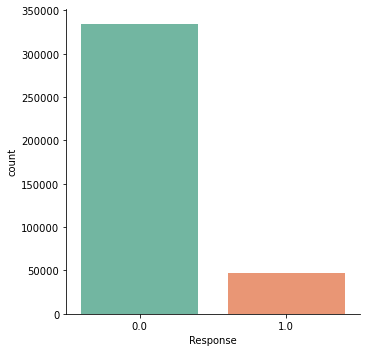

In [19]:
%matplotlib inline
sns.catplot(x="Response", kind="count", palette="Set2", data= df_analysis )

A base está desbalanceada e pode afetar a performance dos algorítmos de Machine Learning

### 4.2 Interesse por valor anual do seguro de saúde.
- Há outliers que não foram tratados referente aos dados de Annual_Premium

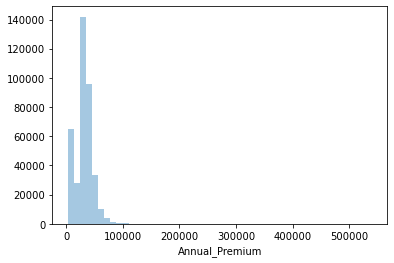

In [20]:
%matplotlib inline
sns.distplot(df.Annual_Premium, kde=False)

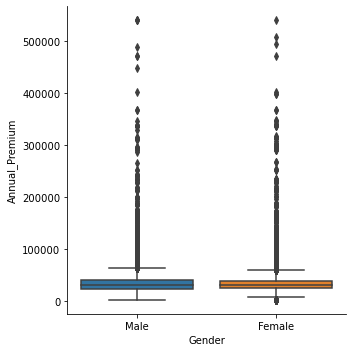

In [21]:
sns.catplot(x="Gender", y="Annual_Premium", kind="box", data=df_analysis);

Há outliers que não foram tratados referente aos dados de Annual_Premium

### 4.3 Interesse por Genero
- É maior a quantidade de homens interessados no seguro em relação as mulheres

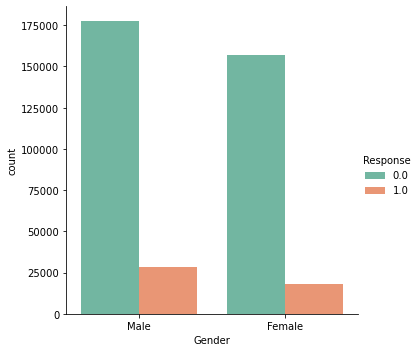

In [22]:
sns.catplot(x="Gender", kind="count", palette="Set2", data= df_analysis, hue = "Response" )

### 4.4 Interesse por Clientes habilitados
- Quase a totalidade dos clientes que possuem interesse no seguro possuem habilitação

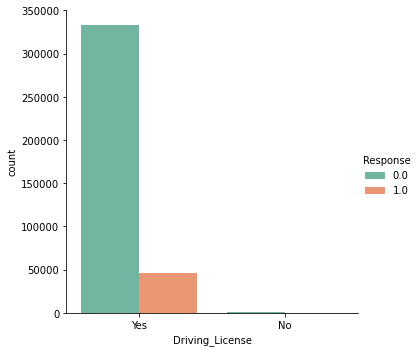

In [23]:
sns.catplot(x="Driving_License", kind="count", palette="Set2", data= df_analysis, hue = "Response" )

### 4.5 Interesse por Região
- 54,37% das pessoas interessadas no seguro estão localizadas nas regiões 28,8 e 41.

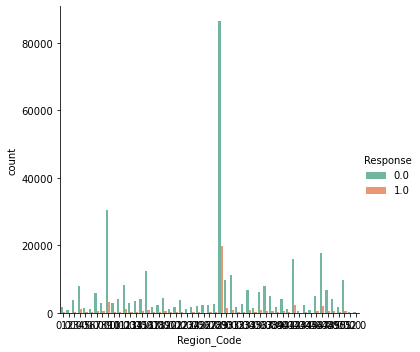

In [24]:
sns.catplot(x="Region_Code", kind="count", palette="Set2", data= df_analysis, hue = "Response" )

In [25]:
df2 =df_analysis.groupby(['Region_Code','Response'])['id'].count().to_frame().rename(columns={'id':'contador'}).reset_index()

In [26]:
df2.head()

,Region_Code,Response,contador
0,0.0,0.0,1847
1,0.0,1.0,174
2,1.0,0.0,899
3,1.0,1.0,109
4,2.0,0.0,3751


<BarContainer object of 106 artists>

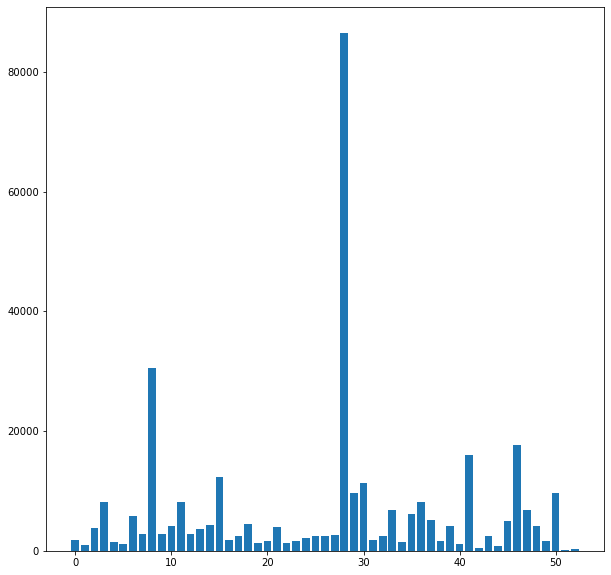

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))


X = df2['Region_Code'].values
Y = df2['contador'].values

ax.bar(X, Y)

In [28]:
df2.sort_values(by=['contador'],ascending=False )[(df2['Response']==1)]

<ipython-input-28-2181ab8c7cb7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2.sort_values(by=['contador'],ascending=False )[(df2['Response']==1)]


,Region_Code,Response,contador
57,28.0,1.0,19917
17,8.0,1.0,3257
83,41.0,1.0,2224
93,46.0,1.0,2032
59,29.0,1.0,1365
7,3.0,1.0,1181
23,11.0,1.0,1041
31,15.0,1.0,958
61,30.0,1.0,900
71,35.0,1.0,865


In [29]:
df2[(df2['Response'] == 1)].contador.sum()

46710

Das 46710 pessoas interessadas no seguro 25398 (54,37%) estão localizadas nas regiões 28,8 e 41.

### 4.6 Interesse por Clientes previamente assegurados.
- 99,66% dos interessados ainda não possuem seguro.

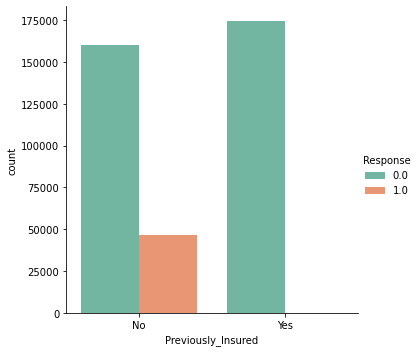

In [30]:
sns.catplot(x="Previously_Insured", kind="count", palette="Set2", data= df_analysis, hue = "Response" )

In [31]:
df2 =df_analysis.groupby(['Previously_Insured','Response'])['id'].count().to_frame().rename(columns={'id':'contador'}).reset_index()

In [32]:
df2.head()

,Previously_Insured,Response,contador
0,No,0.0,159929
1,No,1.0,46552
2,Yes,0.0,174470
3,Yes,1.0,158


99,66% dos interessados ainda não possuem seguro.

### 4.7 Interesse por tempo de uso do veículo.
- 74,51% dos interessados possuem veículos com 1 á 2 anos de uso 

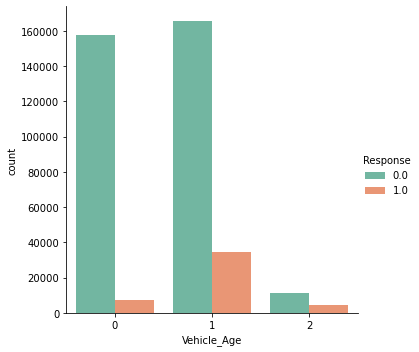

In [33]:
sns.catplot(x="Vehicle_Age", kind="count", palette="Set2", data= df, hue = "Response" )

In [34]:
df2 =df_analysis.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'contador'}).reset_index()
df2.head(100)

,Vehicle_Age,Response,contador
0,1-2 Year,0.0,165510
1,1-2 Year,1.0,34806
2,< 1 Year,0.0,157584
3,< 1 Year,1.0,7202
4,> 2 Years,0.0,11305
5,> 2 Years,1.0,4702


- 74,51% dos interessados possuem veículos com 1 á 2 anos de uso 

### 4.8 Interesse por quantidade de clientes com veículos danificados anteriormente
- 95,84% dos interessados já tiveram o veículo danificado.

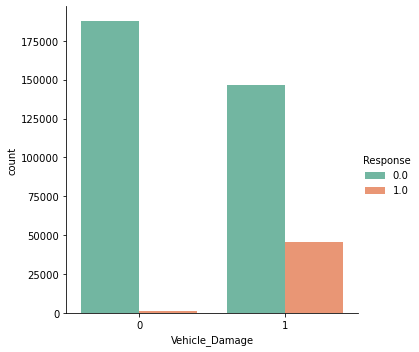

In [35]:
sns.catplot(x="Vehicle_Damage", kind="count", palette="Set2", data= df, hue = "Response" )

In [36]:
df2 =df_analysis.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'contador'}).reset_index()
df2.head(100)

,Vehicle_Damage,Response,contador
0,No,0.0,187714
1,No,1.0,982
2,Yes,0.0,146685
3,Yes,1.0,45728


- 95,84% dos interessados já tiveram o veículo danificado.

### 4.9 Interesse por tempo de fidelidade do cliente
- Aparentemente, não há relação direta entre o tempo de fidelidade e o interesse pelo seguro.

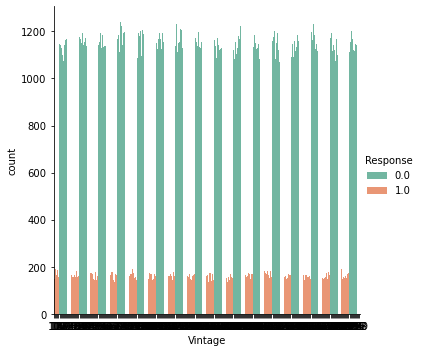

In [37]:
sns.catplot(x="Vintage", kind="count", palette="Set2", data= df, hue = "Response" )

In [38]:
df2 =df_analysis.groupby(['Vintage','Response'])['id'].count().to_frame().rename(columns={'id':'contador'}).reset_index()
df2.head(100)

,Vintage,Response,contador
0,10,0.0,1164
1,10,1.0,147
2,11,0.0,1153
3,11,1.0,191
4,12,0.0,1092
...,...,...,...
95,57,1.0,176
96,58,0.0,1138
97,58,1.0,162
98,59,0.0,1139


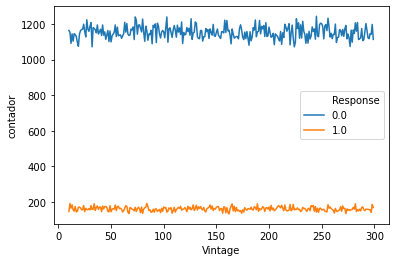

In [41]:
sns.lineplot(data=df2, x="Vintage", y="contador", hue="Response")

- Aparentemente, não há relação direta entre o tempo de fidelidade e o interesse pelo seguro.

### 4.10 Interesse por faixa etária
- A faixa etária de 40 à 50 anos é a que concentra maior número de interessados no seguro

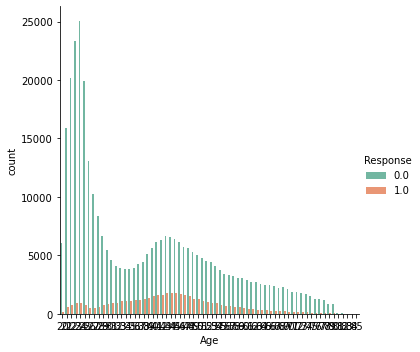

In [43]:
sns.catplot(x="Age", kind="count", palette="Set2", data= df_analysis, hue = "Response" )

In [44]:
table = pd.crosstab(index = df['Age'], columns = df['Response'])

In [45]:
## Renomeia as features
table.rename(columns={0.0: 'Nao'}, inplace = True)
table.rename(columns={1.0: 'Sim'}, inplace = True)

In [46]:
## Criando colunas calculadas

table['Total de Respostas'] = table["Nao"]+table["Sim"]
table

table['% Nao'] = table["Nao"] / (table["Nao"]+table["Sim"])
table

table['% Sim'] = table["Sim"] / (table["Nao"]+table["Sim"])
table


Response,Nao,Sim,Total de Respostas,% Nao,% Sim
Age,,,,,
20,6061,171,6232,0.972561,0.027439
21,15883,574,16457,0.965121,0.034879
22,20201,763,20964,0.963604,0.036396
23,23364,892,24256,0.963226,0.036774
24,25047,913,25960,0.964831,0.035169
...,...,...,...,...,...
81,52,4,56,0.928571,0.071429
82,28,1,29,0.965517,0.034483
83,21,1,22,0.954545,0.045455


In [47]:
# Remove o Index
table = table.reset_index()

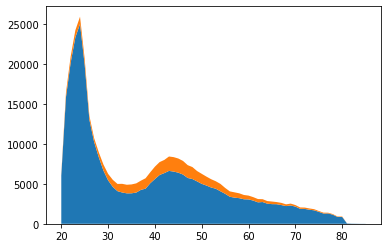

In [48]:
y = np.vstack([table["Nao"], table["Sim"]])
labels = ["Não Interessados ", "Interessados"]
x = table["Age"]

fig, ax = plt.subplots()
ax.stackplot(table["Age"], y, labels=labels)
plt.show()

A faixa etária de 40 à 50 anos é a que concentra maior número de interessados no seguro

## 5. Interações entre variáveis
- Aparentemente, há separabilidade das classes entre os pares de variáveis Annual_Premium e Age, Annual_Premium e Vintage, Age e Vintage

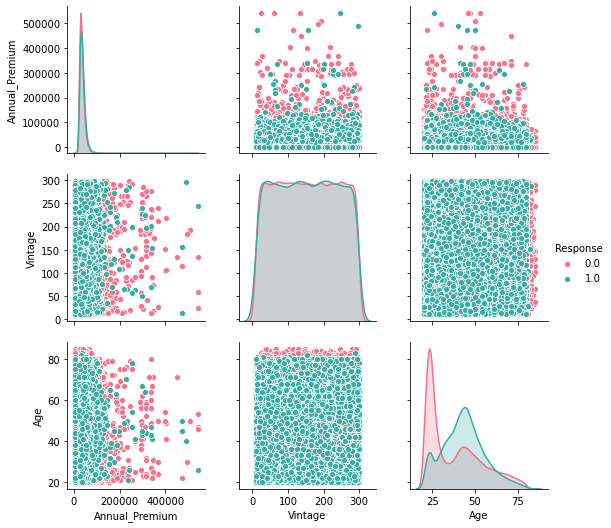

In [49]:
sns.pairplot(df, hue="Response", vars=["Annual_Premium", "Vintage","Age"], palette="husl");

C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


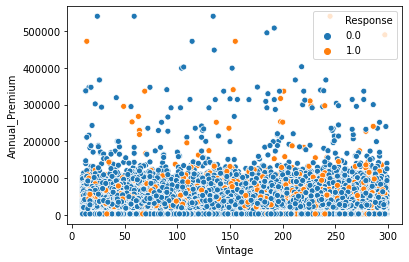

In [50]:
sns.scatterplot(x="Vintage", y="Annual_Premium", hue="Response", data=df)


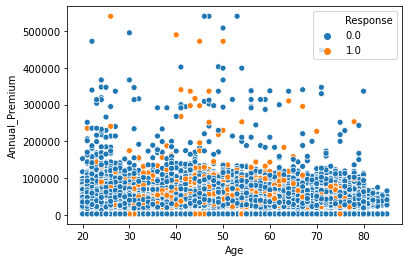

In [51]:
sns.scatterplot(x="Age", y="Annual_Premium", hue="Response", data=df)

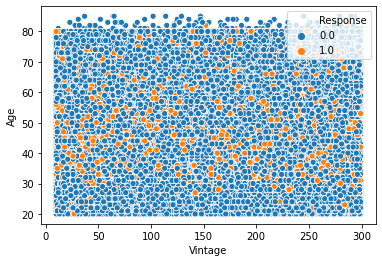

In [52]:
sns.scatterplot(x="Vintage", y="Age", hue="Response", data=df)

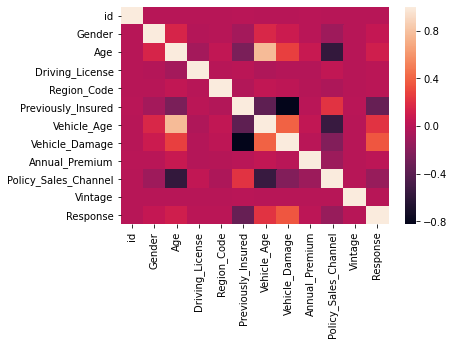

In [40]:
sns.heatmap(df.corr())

## Melhores features

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [43]:
X = df.drop(columns=['id','Response'])

In [44]:
y = df['Response']

In [45]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)

In [46]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [49]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(9,'Score'))  

                  Specs         Score
7        Annual_Premium  1.882769e+06
8  Policy_Sales_Channel  1.932184e+05
1                   Age  2.917911e+04
4    Previously_Insured  2.403383e+04
6        Vehicle_Damage  2.370004e+04
5           Vehicle_Age  9.909317e+03
0                Gender  4.812953e+02
3           Region_Code  2.824091e+02
9               Vintage  1.907164e+01


## 6. Criação de modelos

### 6.1 KNN

As seções 6.1.1 á 6.1.7 exploram variações do modelo avaliando as diferentes métricas, a utilização de técnicas de UnderSampling e quebra de features.

### Modelo Final:
- Utilização técnica de Undersampling apenas
- Melhores Hyperparametros: PCA = 2, Vizinhos = 2
- Métricas do melhor modelo: Recall Classe 1 = 82%, Acurácia = 89,65%

### 6.1.1 KNN - Modelagem inicial

#### Dados
- Não aplicado técnica de UnderSampling
- Não aplicado técnica de Quebra de features

#### Hyperparametros:
- PCA = 2, Vizinhos = 5

#### Resultados
- Recall Classe 1 = 9%, Acurácia = 86,41%

#### Proximos passos:
- utilizar métricas como recall para retreinar o modelo
- utilizar técnicas para lidar com classes desbalanceadas - Undersampling e Quebra de features

In [19]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Obs: É possível usar o GridSearch da propria sklearn é a mesma funcionalidade.

In [19]:
from hypopt import GridSearch

In [20]:
y = df['Response']

In [21]:
X = df.drop(columns=['id','Response'])

In [22]:
###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [23]:
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=3)),
        ('classify', KNeighborsClassifier(n_neighbors=1))])

In [24]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=3)),
                ('classify', KNeighborsClassifier(n_neighbors=1))])

### Hiperparametros
- Variar os hiperparametros de 1 a 5 para a reducao de dimensionalidade no PCA e de 1 a 3 vizinhos mais proximos do KNN

In [25]:
## Procura pelos melhores hyperparametros
param_grid = {
    'reduce_dim__n_components': [1,2,3,4,5],
    'classify__n_neighbors': [1,2,3]
}

In [26]:
## Criação da Grid do Hyplopt
grid = GridSearch(pipe, param_grid=param_grid,cv_folds=5)

In [27]:
## Procura os hyperparametros utilizando os dados de treino com validação cruzada
grid.fit(X_train, y_train)

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=5)),
                ('classify', KNeighborsClassifier(n_neighbors=2))])

In [28]:
## Melhores Hyperparametros do modelo KNN-PCA
print(grid.best_params)

{'classify__n_neighbors': 2, 'reduce_dim__n_components': 5}


In [29]:
grid.best_score

0.8642194221658774

In [30]:
#Melhor classificador selecionado a partir da melhor acuracia sobre os dados de treino
clf = grid.best_estimator_

In [31]:
### Acuracia no conjunto de testes
###from sklearn.metrics import accuracy_score

y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

### Métricas e Matriz de confusão
O classificador teve lato desempenho para classificar clientes não interessados, mas perfomou muito mal para classificar clientes interessados

In [32]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print (pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.93    100320
         1.0       0.31      0.09      0.14     14013

    accuracy                           0.86    114333
   macro avg       0.60      0.53      0.53    114333
weighted avg       0.81      0.86      0.83    114333

Confusion Matrix:
 [[97581  2739]
 [12795  1218]]

Test Data Score:
 86.4133714675553

Predito     0.0   1.0     All
Real                         
0.0       97581  2739  100320
1.0       12795  1218   14013
All      110376  3957  114333


### 6.1.2 KNN -  Modelagem utilizando métrica de scoring recall

Utilizado o Scoring recall para avaliação do modelo pois penaliza alto volume em falso negativos (12795 observações do ultimo treinamento)
Recall = TP / (TP + FN)

#### Dados
- Não aplicado técnica de UnderSampling
- Não aplicado técnica de Quebra de features

#### Hyperparametros
- PCA = 5, Vizinhos = 1

#### Resultados:
- Recall Classe 1 = 28%, Acurácia = 82,34%

#### Conclusões:
- Utilizando Recall como métrica acurácia diminui de 86,4% para 82,34%, no entanto recall aumentou de 9% para 28%. Anda assim, embora tenha diminuido a ocorrencia de falsos negativos, a taxa de recall ainda é muito baixa e há baixo desempenho na classificação de amostras de classe 1.

#### Próximos passos:
- Equilibrar os exemplos de cada classe do dataset

In [33]:
X = df.drop(columns=['id','Response'])
y = df['Response']

In [34]:
###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [35]:
## Procura pelos melhores hyperparametros
param_grid = {
    'reduce_dim__n_components': [1,2,3,4,5],
    'classify__n_neighbors': [1,2,3]
}

In [36]:
## Criação da Grid do Hyplopt
grid = GridSearch(pipe, param_grid=param_grid,cv_folds=5)

In [37]:
# Agora utilizando a métrica RECALL
grid.fit(X_train, y_train, scoring = 'recall')

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=5)),
                ('classify', KNeighborsClassifier(n_neighbors=1))])

In [38]:
## Melhores Hyperparametros do modelo KNN-PCA
print(grid.best_params)

{'classify__n_neighbors': 1, 'reduce_dim__n_components': 5}


In [39]:
grid.best_score

0.2840626904299912

In [40]:
#Melhor classificador selecionado a partir do melhor recall sobre os dados de treino
clf = grid.best_estimator_

In [41]:
## Predição Y_teste
y_test_pred = clf.predict(X_test)

In [42]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90    100320
         1.0       0.28      0.28      0.28     14013

    accuracy                           0.82    114333
   macro avg       0.59      0.59      0.59    114333
weighted avg       0.82      0.82      0.82    114333

Confusion Matrix:
 [[90200 10120]
 [10059  3954]]

Test Data Score:
 82.35067740722276

Predito     0.0    1.0     All
Real                          
0.0       90200  10120  100320
1.0       10059   3954   14013
All      100259  14074  114333


#### Embora tenha diminuido a ocorrencia de falsos negativos, a taxa de recall ainda é muito baixa (28%), indicando baixo desempenho na classificação das classes 1

### 6.1.3 Datasets com Undersampling apenas
- Armazenados nas variáveis X, y

In [18]:
X = df.drop(columns=['id','Response'])
y = df['Response']

In [19]:
nr = NearMiss()
X, y = nr.fit_resample(X, y)

In [20]:
X.shape

(93420, 10)

In [21]:
y.shape

(93420,)

### 6.1.4 Datasets com Quebra de features e Undersampling
- Quebra de features categóricas (Region_code e Policy_Sales_Channel) em vetores binários
- Undersampling: Nearmiss
- Armazenados nas variáveis X_quebra, y_quebra

### Quebra de Features

In [86]:
##Quebra de Features
df_quebra = df.copy()
df_quebra.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1.0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0


In [25]:
df_quebra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int32  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int32  
 7   Vehicle_Damage        381109 non-null  int32  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int32(3), int64(5)
memory usage: 33.4 MB


In [26]:
L = df_quebra['Region_Code'].unique().tolist()
for i in L:
    df_quebra['Region_Code'].replace(i,str(i))

df_quebra.Region_Code = df_quebra.Region_Code.astype('object')   

In [27]:
L = df_quebra['Policy_Sales_Channel'].unique().tolist()
for i in L:
    df_quebra['Policy_Sales_Channel'].replace(i,str(i))

df_quebra.Policy_Sales_Channel = df_quebra.Policy_Sales_Channel.astype('object')   

In [28]:
df_quebra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int32  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int32  
 7   Vehicle_Damage        381109 non-null  int32  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 33.4+ MB


In [29]:
df_quebra = pd.get_dummies(df_quebra)

In [30]:
df_quebra.head()

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,1,1,44,1,0,2,1,40454.0,217,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,76,1,0,1,0,33536.0,183,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,47,1,0,2,1,38294.0,27,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,21,1,1,0,0,28619.0,203,0.0,...,1,0,0,0,0,0,0,0,0,0
4,5,0,29,1,1,0,0,27496.0,39,0.0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
L = df_quebra.columns.tolist()
for i in L:
 print(i)

id
Gender
Age
Driving_License
Previously_Insured
Vehicle_Age
Vehicle_Damage
Annual_Premium
Vintage
Response
Region_Code_0.0
Region_Code_1.0
Region_Code_2.0
Region_Code_3.0
Region_Code_4.0
Region_Code_5.0
Region_Code_6.0
Region_Code_7.0
Region_Code_8.0
Region_Code_9.0
Region_Code_10.0
Region_Code_11.0
Region_Code_12.0
Region_Code_13.0
Region_Code_14.0
Region_Code_15.0
Region_Code_16.0
Region_Code_17.0
Region_Code_18.0
Region_Code_19.0
Region_Code_20.0
Region_Code_21.0
Region_Code_22.0
Region_Code_23.0
Region_Code_24.0
Region_Code_25.0
Region_Code_26.0
Region_Code_27.0
Region_Code_28.0
Region_Code_29.0
Region_Code_30.0
Region_Code_31.0
Region_Code_32.0
Region_Code_33.0
Region_Code_34.0
Region_Code_35.0
Region_Code_36.0
Region_Code_37.0
Region_Code_38.0
Region_Code_39.0
Region_Code_40.0
Region_Code_41.0
Region_Code_42.0
Region_Code_43.0
Region_Code_44.0
Region_Code_45.0
Region_Code_46.0
Region_Code_47.0
Region_Code_48.0
Region_Code_49.0
Region_Code_50.0
Region_Code_51.0
Region_Code_52.0
P

In [32]:
### Redefinição X e y
X_quebra = df_quebra.drop(columns=['id','Response'])
y_quebra = df_quebra['Response']

### UnderSampling

In [33]:
nr = NearMiss()
X_quebra, y_quebra = nr.fit_resample(X_quebra, y_quebra)

In [34]:
X_quebra.shape

(93420, 216)

In [35]:
X.shape

(93420, 10)

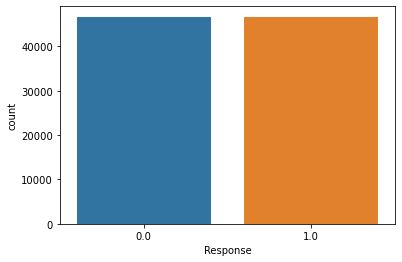

In [36]:
ax = sns.countplot(x=y_quebra)

### 6.1.5 KNN - Modelagem utilizando quebra de features e Undersampling.


#### Dados
- Aplicado técnica de UnderSampling e quebra de features

####  Hyperparametros:
- PCA = 7, Vizinhos = 2

#### Resultados:
- Recall Classe 1 = 82%, Acurácia = 88,96%

#### Conclusão:
- Performance superior à não aplicação das duas técnicas.

#### Proximos passos:
- Avaliar modelagem utilizando apenas UnderSampling


In [118]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_quebra, y_quebra, test_size=0.3, random_state=1, stratify=y) ### 

In [119]:
### Pipeline 
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=5)),
        ('classify', KNeighborsClassifier(n_neighbors=2))])

In [120]:
## Procura pelos melhores hyperparametros
param_grid = {
    'reduce_dim__n_components': [1,2,3,4,5,6,7,8,9],
    'classify__n_neighbors': [2,3]
}

In [121]:
## Criação da Grid do Hyplopt
grid = GridSearch(pipe, param_grid=param_grid,cv_folds=5)

In [122]:
## Procura os hyperparametros utilizando os dados de treino com validação cruzada
grid.fit(X_train, y_train)

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=6)),
                ('classify', KNeighborsClassifier(n_neighbors=2))])

In [123]:
#Melhor classificador selecionado a partir da melhor acuracia sobre os dados de treino
clf = grid.best_estimator_

In [124]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [125]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print (pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.96      0.90     14013
         1.0       0.96      0.82      0.88     14013

    accuracy                           0.89     28026
   macro avg       0.90      0.89      0.89     28026
weighted avg       0.90      0.89      0.89     28026

Confusion Matrix:
 [[13479   534]
 [ 2561 11452]]

Test Data Score:
 88.95668307999715

Predito    0.0    1.0    All
Real                        
0.0      13479    534  14013
1.0       2561  11452  14013
All      16040  11986  28026


### 6.1.6 KNN - Tuning com Undersampling apenas

#### Dados
- Aplicado técnica de UnderSampling apenas

#### Hyperparametros
- PCA = 2, Vizinhos = 2

#### Resultados:
- Recall Classe 1 = 83%, Acurácia = 89,65%

#### Conclusões: 
- A performance da aplicação das técnicas de Undersampling  foi superior a utilização dos dados aplicados as tecnicas de Quebra de Features e Undersampling.

In [126]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [127]:
### Pipeline 
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=5)),
        ('classify', KNeighborsClassifier(n_neighbors=2))])

In [128]:
## Procura pelos melhores hyperparametros
param_grid = {
    'reduce_dim__n_components': [1,2,3,4,5,6,7,8,9],
    'classify__n_neighbors': [2,3]
}

In [129]:
## Criação da Grid do Hyplopt
grid = GridSearch(pipe, param_grid=param_grid,cv_folds=5)

In [130]:
## Procura os hyperparametros utilizando os dados de treino com validação cruzada
grid.fit(X_train, y_train)

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify', KNeighborsClassifier(n_neighbors=2))])

In [131]:
#Melhor classificador selecionado a partir da melhor acuracia sobre os dados de treino
clf = grid.best_estimator_

In [132]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [133]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print (pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     14013
         1.0       0.96      0.83      0.89     14013

    accuracy                           0.90     28026
   macro avg       0.90      0.90      0.90     28026
weighted avg       0.90      0.90      0.90     28026

Confusion Matrix:
 [[13529   484]
 [ 2415 11598]]

Test Data Score:
 89.65603368300864

Predito    0.0    1.0    All
Real                        
0.0      13529    484  14013
1.0       2415  11598  14013
All      15944  12082  28026


### 6.1.7 Melhor Modelo KNN

#### Dados
- Aplicado técnica de UnderSampling

####  Hyperparametros:
- PCA = 2, Vizinhos = 2

#### Resultados:
- Recall Classe 1 = 82%, Acurácia = 89,65%


In [22]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [23]:
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=2)),
        ('classify', KNeighborsClassifier(n_neighbors=2))])

In [24]:
clf = pipe.fit(X_train, y_train)

In [25]:
knn_model = clf

In [26]:
knn_pred_test_y=knn_model.predict(X_test)

In [27]:
y_test_pred = knn_pred_test_y

In [28]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, knn_pred_test_y, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     14013
         1.0       0.96      0.83      0.89     14013

    accuracy                           0.90     28026
   macro avg       0.90      0.90      0.90     28026
weighted avg       0.90      0.90      0.90     28026

Confusion Matrix:
 [[13529   484]
 [ 2416 11597]]

Test Data Score:
 89.65246556768714

Predito    0.0    1.0    All
Real                        
0.0      13529    484  14013
1.0       2416  11597  14013
All      15945  12081  28026


In [31]:
X_df = df.drop(columns=['id','Response'])
y_df = df['Response']

In [32]:
clf.score(X_df,y_df)

0.3080745928330215

### 6.2 Regressão Logistica
- Foram exploradas variações do modelo avaliando as diferentes métricas e a utilização de técnicas de UnderSampling e quebra de features.


### Modelo Final:
- Utilização técnica de Undersampling apenas
- Melhores Hyperparametros: PCA = 8, C = 0.2
- Métricas do melhor modelo: Recall Classe 1 = 81%, Acurácia = 90,71%

In [194]:
###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [195]:
### Pipeline
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=5)),
        ('classify', LogisticRegression())])

In [196]:
param_grid = {
    'reduce_dim__n_components': [5,6,7,8,9],
    'classify__C': [0.1,0.2,0.3,0.4,0.5]
}

In [197]:
## Criação da Grid do Hyplopt
grid = GridSearch(pipe, param_grid=param_grid,cv_folds=5)

In [198]:
## Procura os hyperparametros utilizando os dados de treino com validação cruzada
grid.fit(X_train, y_train)

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=8)),
                ('classify', LogisticRegression(C=0.2))])

In [199]:
#Melhor classificador selecionado a partir da melhor acuracia sobre os dados de treino
clf = grid.best_estimator_

In [200]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [201]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026

Confusion Matrix:
 [[14007     6]
 [ 2595 11418]]

Test Data Score:
 90.71933204881182

Predito    0.0    1.0    All
Real                        
0.0      14007      6  14013
1.0       2595  11418  14013
All      16602  11424  28026


### Melhor Modelo Regressão Logistica

In [35]:
###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [36]:
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=8)),
        ('classify', LogisticRegression(C=0.2))])

In [37]:
clf = pipe.fit(X_train, y_train)

In [38]:
lr_model = clf

In [39]:
lr_pred_test_y = lr_model.predict(X_test)

In [40]:
y_test_pred = lr_pred_test_y

In [41]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026

Confusion Matrix:
 [[14007     6]
 [ 2595 11418]]

Test Data Score:
 90.71933204881182

Predito    0.0    1.0    All
Real                        
0.0      14007      6  14013
1.0       2595  11418  14013
All      16602  11424  28026


In [42]:
X_df = df.drop(columns=['id','Response'])
y_df = df['Response']

In [43]:
clf.score(X_df,y_df)

0.2673487112610828

### 6.3 SVM
Foram exploradas variações do modelo avaliando as diferentes métricas e a utilização de técnicas de UnderSampling e quebra de features.


#### Resultados
- Melhores Hyperparametros: PCA = 2, C  1, Gamma = 1 , Kernel = 'rbf'
- Métricas modelo: Recall Classe 1  = 80%, Acurácia = 90,63%

In [249]:
###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [255]:
### Pipeline
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=2)),
        ('classify', svm.SVC(C=1, gamma=1, kernel = 'rbf'))])

In [234]:
param_grid = {
    'reduce_dim__n_components': [2,4,6],
    'classify__C': [0.1, 1],
    'classify__gamma': [0.1, 1],
    'classify__kernel': ['rbf']
}


In [235]:
## Criação da Grid do Hyplopt
grid = GridSearch(pipe, param_grid=param_grid,cv_folds=5)

In [236]:
## Procura os hyperparametros utilizando os dados de treino com validação cruzada
grid.fit(X_train, y_train)

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify', SVC(C=1, gamma=1))])

In [239]:
#Melhor classificador selecionado a partir da melhor acuracia sobre os dados de treino
clf = grid.best_estimator_


In [256]:
#clf = pipe.fit(X_train, y_train)

In [257]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [258]:
acc_test

0.8980232641118961

In [259]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",acc_test*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     14013
         1.0       1.00      0.80      0.89     14013

    accuracy                           0.90     28026
   macro avg       0.91      0.90      0.90     28026
weighted avg       0.91      0.90      0.90     28026

Confusion Matrix:
 [[13996    17]
 [ 2841 11172]]

Test Data Score:
 89.80232641118961

Predito    0.0    1.0    All
Real                        
0.0      13996     17  14013
1.0       2841  11172  14013
All      16837  11189  28026


- Undersampling =  89,91% + 80%
- Undersampling Tuning = 90,62 + 81% C=1 ( variando entre 0,1 e 1), gamma=1 (variando entre 0,1 a 1), PCA = 2 ( variando entre 2,4,6)
- Undersampling + Quebra de features = 86,44 + 84% (PCA = 5)

### Melhor Modelo SVM

In [44]:
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=2)),
        ('classify', svm.SVC(C=1, gamma=1, kernel = 'rbf'))])

In [45]:
clf = pipe.fit(X_train, y_train)

In [46]:
svm_model = clf

In [47]:
svm_pred_test_y=svm_model.predict(X_test)

In [48]:
y_test_pred = svm_pred_test_y

In [49]:
score_svm = clf.score(X_test,y_test)

In [50]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",score_svm*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026

Confusion Matrix:
 [[14005     8]
 [ 2620 11393]]

Test Data Score:
 90.62299293513166

Predito    0.0    1.0    All
Real                        
0.0      14005      8  14013
1.0       2620  11393  14013
All      16625  11401  28026


In [51]:
X_df = df.drop(columns=['id','Response'])
y_df = df['Response']

In [52]:
clf.score(X_df,y_df)

0.3031337491373859

### 6.4 Naive Bayes


#### Resultados
- Não aplicado técnica de quebra de features
- Não aplicado técnica de redução de dimensionalidade
- Aplicado técnica de Undersampling
- Melhores Hyperparametros: Padrão
- Métricas modelo: Recall Classe 1  = 81% Acurácia = 90,71%

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [55]:
clf = GaussianNB()

In [56]:
clf.fit(X_train, y_train)

GaussianNB()

In [57]:
nb_model = clf

In [58]:
nb_pred_test_y= nb_model.predict(X_test)

In [59]:
y_test_pred = nb_pred_test_y

In [60]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026

Confusion Matrix:
 [[14007     6]
 [ 2595 11418]]

Test Data Score:
 90.71933204881182

Predito    0.0    1.0    All
Real                        
0.0      14007      6  14013
1.0       2595  11418  14013
All      16602  11424  28026


In [61]:
X_df = df.drop(columns=['id','Response'])
y_df = df['Response']

In [62]:
clf.score(X_df,y_df)

0.24816259915142386

### 6.5 Arvores de Decisão
- Utilizado dataset após aplicação de técnicas de undersampling e sem quebra de features

#### Modelo Final
- Não aplicado técnica de redução de dimensionalidade 
- Não aplicado técnica de quebra de features
- Aplicado técnica de undersampling
- Aplicado seleção de features mais importantes: ['Age', 'Annual_Premium', 'Region_Code', 'Policy_Sales_Channel', 'Vehicle_Age']
- Melhores Hyperparametros: criterion = entropy, max_depth = 10 
- Métricas modelo: Recall Classe 1  = 82% , Acurácia = 90,6%

In [507]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [508]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [509]:
### Pipeline
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=5)),
        ('classify', tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10))])

In [510]:
clf = pipe.fit(X_train, y_train)

In [511]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [512]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     14013
         1.0       0.99      0.81      0.89     14013

    accuracy                           0.90     28026
   macro avg       0.92      0.90      0.90     28026
weighted avg       0.92      0.90      0.90     28026

Confusion Matrix:
 [[13902   111]
 [ 2602 11411]]

Test Data Score:
 90.31970313280524

Predito    0.0    1.0    All
Real                        
0.0      13902    111  14013
1.0       2602  11411  14013
All      16504  11522  28026


### Tuning: Seleção de variáveis do algorítmo

In [513]:
param_grid = {
    'reduce_dim__n_components': [1,2,3,4,5],
    'classify__max_depth': [5,10,15],
    'classify__criterion': ['gini','entropy']
}

In [514]:
## Criação da Grid do Hyplopt
grid = GridSearch(pipe, param_grid=param_grid,cv_folds=5)

In [515]:
## Procura os hyperparametros utilizando os dados de treino com validação cruzada
grid.fit(X_train, y_train)

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10))])

In [516]:
print(grid.best_params)

{'classify__criterion': 'entropy', 'classify__max_depth': 10, 'reduce_dim__n_components': 2}


In [517]:
clf = grid.best_estimator_

In [518]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [519]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     14013
         1.0       0.99      0.81      0.89     14013

    accuracy                           0.90     28026
   macro avg       0.92      0.90      0.90     28026
weighted avg       0.92      0.90      0.90     28026

Confusion Matrix:
 [[13945    68]
 [ 2620 11393]]

Test Data Score:
 90.40890601584243

Predito    0.0    1.0    All
Real                        
0.0      13945     68  14013
1.0       2620  11393  14013
All      16565  11461  28026


### Tuning 2: Seleção de features mais importantes

In [520]:
data = df.copy()
### data = data.drop(columns=['id','Response'])
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1.0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0


In [521]:
y_tree = data['Response']
y_tree.shape

(381109,)

In [522]:
scaler = StandardScaler().fit(data)

In [523]:
data = scaler.transform(data)

In [524]:
data

array([[-1.73204626,  0.92154476,  0.33377727, ..., -1.58723371,
         0.74879538,  2.67563921],
       [-1.73203717,  0.92154476,  2.39675074, ..., -1.58723371,
         0.34244286, -0.37374247],
       [-1.73202808,  0.92154476,  0.52718104, ..., -1.58723371,
        -1.52199808,  2.67563921],
       ...,
       [ 1.73202808,  0.92154476, -1.14898491, ...,  0.88491205,
         0.07950888, -0.37374247],
       [ 1.73203717, -1.08513449,  1.88100737, ...,  0.22075349,
        -0.96027549, -0.37374247],
       [ 1.73204626,  0.92154476,  0.46271311, ..., -1.58723371,
         0.98782627, -0.37374247]])

In [525]:
X_tree = data[:,1:11]
X_tree.shape

(381109, 10)

In [526]:
#Undersampling
nr = NearMiss()
X_tree, y_tree = nr.fit_resample(X_tree, y_tree)

In [527]:
X_tree.shape

(93420, 10)

In [528]:
y_tree.shape

(93420,)

In [529]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=1, stratify=y) ### 

In [530]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [531]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [532]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [533]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.80      0.72     14013
         1.0       0.74      0.58      0.65     14013

    accuracy                           0.69     28026
   macro avg       0.70      0.69      0.68     28026
weighted avg       0.70      0.69      0.68     28026

Confusion Matrix:
 [[11158  2855]
 [ 5886  8127]]

Test Data Score:
 68.81110397488047

Predito    0.0    1.0    All
Real                        
0.0      11158   2855  14013
1.0       5886   8127  14013
All      17044  10982  28026


In [534]:
clf.feature_importances_

array([0.02531691, 0.25944504, 0.        , 0.19626024, 0.        ,
       0.09960463, 0.04278211, 0.21236944, 0.1479316 , 0.01629004])

In [535]:
## Lista de features
L = df.columns.tolist()
features_names = L[1:11]
class_names = L[11:]

In [536]:
feature_imp = pd.Series(clf.feature_importances_,index=features_names).sort_values(ascending=False)
feature_imp

Age                     0.259445
Annual_Premium          0.212369
Region_Code             0.196260
Policy_Sales_Channel    0.147932
Vehicle_Age             0.099605
Vehicle_Damage          0.042782
Gender                  0.025317
Vintage                 0.016290
Previously_Insured      0.000000
Driving_License         0.000000
dtype: float64

In [537]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

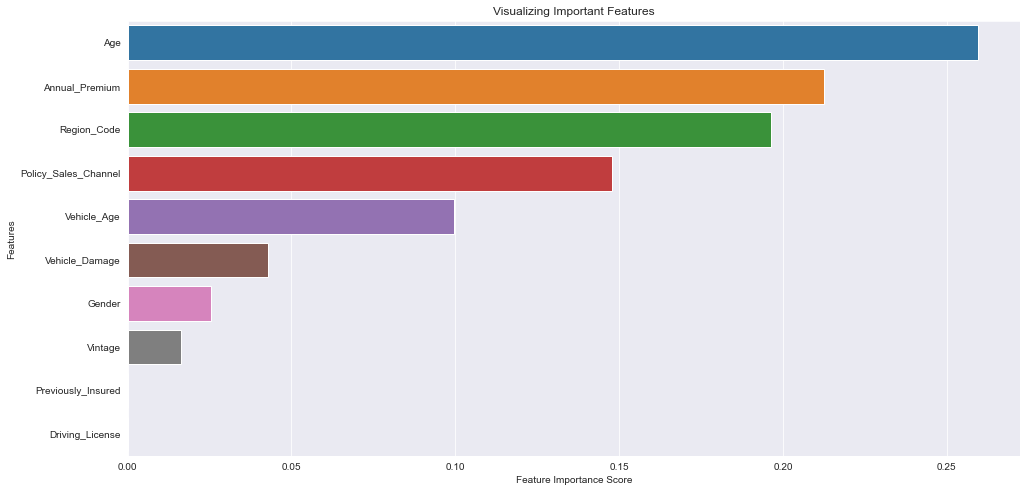

In [538]:
visualiza_features_importantes(feature_imp)

In [539]:
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if importancia > 0.09:
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

Age:	0.25944503629906895
Annual_Premium:	0.2123694350774816
Region_Code:	0.1962602393961507
Policy_Sales_Channel:	0.14793159863117583
Vehicle_Age:	0.09960463091600108


### Retreinando o modelo com as features selecionadas

In [540]:
data = df.copy()
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1.0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0


In [541]:
y_feat = data['Response']
X_feat = data[features_selecionadas]

In [542]:
nr = NearMiss()
X_feat, y_feat = nr.fit_resample(X_feat, y_feat)

In [543]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_feat, y_feat, test_size=0.3, random_state=1, stratify=y) ### 

In [544]:
### Pipeline
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=5)),
        ('classify', tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10))])

In [545]:
param_grid = {
    'reduce_dim__n_components': [1,2,3,4,5],
    'classify__max_depth': [5,10,15],
    'classify__criterion': ['gini','entropy']
}

In [546]:
## Criação da Grid do Hyplopt
grid = GridSearch(pipe, param_grid=param_grid,cv_folds=5)

In [547]:
## Procura os hyperparametros utilizando os dados de treino com validação cruzada
grid.fit(X_train, y_train)

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=5)),
                ('classify',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10))])

In [550]:
print(grid.best_params)

{'classify__criterion': 'entropy', 'classify__max_depth': 10, 'reduce_dim__n_components': 5}


In [551]:
clf = grid.best_estimator_

In [552]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [553]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)


In [554]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     14013
         1.0       0.99      0.82      0.90     14013

    accuracy                           0.90     28026
   macro avg       0.92      0.90      0.90     28026
weighted avg       0.92      0.90      0.90     28026

Confusion Matrix:
 [[13873   140]
 [ 2532 11481]]

Test Data Score:
 90.46599586098623

Predito    0.0    1.0    All
Real                        
0.0      13873    140  14013
1.0       2532  11481  14013
All      16405  11621  28026


### Melhor Modelo Decision Tree

In [63]:
features_selecionadas = ['Age', 'Annual_Premium', 'Region_Code', 'Policy_Sales_Channel', 'Vehicle_Age']

In [64]:
data = df.copy()
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1.0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0


In [65]:
y_tree = data['Response']
X_tree = data[features_selecionadas]

In [66]:
nr = NearMiss()
X_tree, y_tree = nr.fit_resample(X_tree, y_tree)

In [67]:
### Split dos dados em treinamento e teste
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.3, random_state=1, stratify=y) ### 

In [68]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [69]:
clf.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [70]:
dt_model = clf

In [71]:
dt_pred_test_y=dt_model.predict(X_test_tree)

In [72]:
print("Classification Report:\n",classification_report(y_test_tree,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test_tree,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test_tree,y_test_tree)*100)
print("")
print(pd.crosstab(y_test_tree, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026

Confusion Matrix:
 [[14007     6]
 [ 2595 11418]]

Test Data Score:
 90.57660743595233

Predito    0.0    1.0    All
Real                        
0.0      14007      6  14013
1.0       2595  11418  14013
All      16602  11424  28026


### Conclusões:
Modelos com redução de dimensionalidade e com seleção de features tiveram performances equivalentes, em de score = 90% e recall na classe 1 = 81%

### 6.6 Random Forest
- Utilizado dataset após aplicação de técnicas de undersampling e sem quebra de features
- Utilizado acurácia como avaliação do modelo, pois as classes estão balanceadas.
- Utilizado o PCA em detrimento da seleção de features uma vez que possuem performances semelhantes em arvores de decisão.

####  Modelo Final:

- Melhores Hyperparametros: PCA = 2, max_depth = 10, criterion = 'entropy'
- Métricas modelo: Recall Classe 1  = 81%,  Acurácia = 90,61%

In [91]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [92]:
### Pipeline
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=5)),
        ('classify', RandomForestClassifier())])


In [93]:
clf = pipe.fit(X_train, y_train)

In [94]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [445]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.70      0.66     14013
         1.0       0.66      0.58      0.62     14013

    accuracy                           0.64     28026
   macro avg       0.64      0.64      0.64     28026
weighted avg       0.64      0.64      0.64     28026

Confusion Matrix:
 [[9829 4184]
 [5881 8132]]

Test Data Score:
 64.08691928923143

Predito    0.0    1.0    All
Real                        
0.0       9829   4184  14013
1.0       5881   8132  14013
All      15710  12316  28026


### Tuning

In [462]:
### Pipeline
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA()),
        ('classify', RandomForestClassifier())])

In [463]:
param_grid = {
    'reduce_dim__n_components': [2,4,5],
    'classify__max_depth': [7,10],
    'classify__criterion': ['gini','entropy']
}

In [464]:
## Criação da Grid do Hyplopt
grid = GridSearch(pipe, param_grid=param_grid,cv_folds=5)

In [465]:
## Procura os hyperparametros utilizando os dados de treino com validação cruzada
grid.fit(X_train, y_train)

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify', RandomForestClassifier(max_depth=10))])

In [466]:
print(grid.best_params)

{'classify__criterion': 'gini', 'classify__max_depth': 10, 'reduce_dim__n_components': 2}


In [467]:
clf = grid.best_estimator_

In [468]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [469]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026

Confusion Matrix:
 [[13980    33]
 [ 2595 11418]]

Test Data Score:
 90.62299293513166

Predito    0.0    1.0    All
Real                        
0.0      13980     33  14013
1.0       2595  11418  14013
All      16575  11451  28026


### Melhor Modelo Random Forest

In [73]:
##X_rf = df.drop(columns=['id','Response'])
##y_rf = df['Response']

In [74]:
##nr = NearMiss()
##X_rf, y_rf = nr.fit_resample(X_rf, y_rf)

In [75]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [76]:
pipe = Pipeline([('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify',
                 RandomForestClassifier(criterion='entropy', max_depth=10))])

In [77]:
clf = pipe.fit(X_train, y_train)

In [78]:
rf_model = clf

In [79]:
rf_pred_test_y=rf_model.predict(X_test)

In [80]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026

Confusion Matrix:
 [[14007     6]
 [ 2595 11418]]

Test Data Score:
 90.62656105045315

Predito    0.0    1.0    All
Real                        
0.0      14007      6  14013
1.0       2595  11418  14013
All      16602  11424  28026


In [81]:
X_df = df.drop(columns=['id','Response'])
y_df = df['Response']

In [82]:
clf.score(X_df,y_df)

0.36309822124379115

### 6.7 XGBoost
- Não aplicado técnica de Quebra de features
- Aplicado técnicas de undersampling
- Aplicado técnica de redução de dimensionalidade


#### Modelo Final
- Melhores Hyperparametros: PCA = 2, max_depth = 5
- Métricas modelo: Recall Classe 1  = 82%  Acurácia = 90.52%

In [236]:
### Redefinição X e y
##X = df.drop(columns=['id','Response'])
##y = df['Response']

In [237]:
##nr = NearMiss()
##X, y = nr.fit_resample(X, y)

In [103]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [104]:
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=5)),
        ('classify', XGBClassifier())])

In [105]:
clf = pipe.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:15:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [106]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [107]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     14013
         1.0       0.99      0.82      0.89     14013

    accuracy                           0.90     28026
   macro avg       0.92      0.90      0.90     28026
weighted avg       0.92      0.90      0.90     28026

Confusion Matrix:
 [[13867   146]
 [ 2551 11462]]

Test Data Score:
 90.37679297794905

Predito    0.0    1.0    All
Real                        
0.0      13867    146  14013
1.0       2551  11462  14013
All      16418  11608  28026


### Tuning

In [282]:
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=5)),
        ('classify', XGBClassifier())])

In [283]:
param_grid = {
    'reduce_dim__n_components': [2,4,5],
    'classify__max_depth': [2,5,10]
}

In [284]:
## Criação da Grid do Hyplopt
grid = GridSearch(pipe, param_grid=param_grid,cv_folds=5)

In [285]:
## Procura os hyperparametros utilizando os dados de treino com validação cruzada
grid.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:56:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
   

In [286]:
print(grid.best_params)

{'classify__max_depth': 5, 'reduce_dim__n_components': 2}


In [287]:
clf = grid.best_estimator_

In [309]:
clf

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=5)),
                ('classify',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
   

In [288]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [289]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     14013
         1.0       0.99      0.82      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.90     28026
weighted avg       0.92      0.91      0.90     28026

Confusion Matrix:
 [[13931    82]
 [ 2574 11439]]

Test Data Score:
 90.52308570613002

Predito    0.0    1.0    All
Real                        
0.0      13931     82  14013
1.0       2574  11439  14013
All      16505  11521  28026


### Melhor Modelo XGB

In [83]:
###X = df.drop(columns=['id','Response'])
###y = df['Response']

In [84]:
###nr = NearMiss()
###X, y = nr.fit_resample(X, y)

In [85]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [86]:
pipe = Pipeline([('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify', XGBClassifier(max_depth = 5))])

In [87]:
clf = pipe.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [88]:
xgb_model = clf

In [89]:
xgb_pred_test_y=rf_model.predict(X_test)

In [90]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026

Confusion Matrix:
 [[14007     6]
 [ 2595 11418]]

Test Data Score:
 90.52308570613002

Predito    0.0    1.0    All
Real                        
0.0      14007      6  14013
1.0       2595  11418  14013
All      16602  11424  28026


In [91]:
X_df = df.drop(columns=['id','Response'])
y_df = df['Response']

In [92]:
clf.score(X_df,y_df)

0.4007462432007641

### 6.8 MLP
- Não aplicado técnica de Quebra de features
- Aplicado técnicas de undersampling
- Aplicado técnica de redução de dimensionalidade


#### Modelo Final
- Melhores Hyperparametros: PCA = 2, max_depth = 5
- Métricas modelo: Recall Classe 1  = 81%  Acurácia = 90.72%

In [268]:
from sklearn.neural_network import MLPClassifier    # MLP

In [269]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [419]:
pipe = Pipeline([
        ('z-score', StandardScaler()),
        ('reduce_dim', PCA(n_components=8)),
        ('classify', MLPClassifier(hidden_layer_sizes=15, activation='relu',max_iter= 15000, solver='adam', random_state = 1))])

In [420]:
param_grid = {
    'reduce_dim__n_components': [4, 6, 8],
    'classify__hidden_layer_sizes': [10, 15, 20],
    'classify__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'classify__max_iter': [15000],
    'classify__solver': ['adam'],
    'classify__random_state': [1]
    
}

In [421]:
grid = GridSearch(pipe, param_grid=param_grid)

In [422]:
grid.fit(X_train,y_train)

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=8)),
                ('classify',
                 MLPClassifier(activation='identity', hidden_layer_sizes=15,
                               max_iter=15000, random_state=1))])

In [425]:
print(grid.best_params)

{'classify__activation': 'identity', 'classify__hidden_layer_sizes': 15, 'classify__max_iter': 15000, 'classify__random_state': 1, 'classify__solver': 'adam', 'reduce_dim__n_components': 8}


In [427]:
clf = grid.best_estimator_

In [428]:
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

In [429]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026

Confusion Matrix:
 [[14007     6]
 [ 2595 11418]]

Test Data Score:
 90.71933204881182

Predito    0.0    1.0    All
Real                        
0.0      14007      6  14013
1.0       2595  11418  14013
All      16602  11424  28026


In [430]:
param_grid

{'reduce_dim__n_components': [4, 6, 8],
 'classify__hidden_layer_sizes': [10, 15, 20],
 'classify__activation': ['identity', 'logistic', 'tanh', 'relu'],
 'classify__max_iter': [15000],
 'classify__solver': ['adam'],
 'classify__random_state': [1]}

### Melhor Modelo MLP

In [105]:
### Split dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

In [106]:
pipe = Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=8)),
                ('classify',
                 MLPClassifier(activation='identity', hidden_layer_sizes=15,
                               max_iter=15000, random_state=1, solver = 'adam'))])

In [107]:
clf = pipe.fit(X_train,y_train)

In [108]:
mlp_model = clf

In [109]:
mlp_pred_test_y = mlp_model.predict(X_test)

In [110]:
y_test_pred = mlp_pred_test_y

In [111]:
print("Classification Report:\n",classification_report(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print(pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026

Confusion Matrix:
 [[14007     6]
 [ 2595 11418]]

Test Data Score:
 90.71933204881182

Predito    0.0    1.0    All
Real                        
0.0      14007      6  14013
1.0       2595  11418  14013
All      16602  11424  28026


In [112]:
X_df = df.drop(columns=['id','Response'])
y_df = df['Response']

In [113]:
clf.score(X_df,y_df)

0.25907023974768373

In [102]:
y_df_pred = mlp_model.predict(X_df)

In [104]:
print("Confusion Matrix:\n",confusion_matrix(y_df,y_df_pred))

Confusion Matrix:
 [[114329 220070]
 [  8311  38399]]


## 7. Avaliação e Validação de modelos

In [117]:
# Modelos
knn_model
lr_model
svm_model
nb_model
dt_model
rf_model
xgb_model
mlp_model

## Predições
knn_pred_test_y
lr_pred_test_y
svm_pred_test_y
nb_pred_test_y
dt_pred_test_y
rf_pred_test_y
xgb_pred_test_y

array([0., 0., 0., ..., 1., 0., 1.])

In [ ]:
## Instanciando as curvas ROC
bc1 = BinaryClassification(y_test, knn_pred_test_y, labels=["Não interessados", "Interessados"])
bc2 = BinaryClassification(y_test, lr_pred_test_y, labels=["Não interessados", "Interessados"])
bc3 = BinaryClassification(y_test, svm_pred_test_y, labels=["Não interessados", "Interessados"])
bc4 = BinaryClassification(y_test, nb_pred_test_y, labels=["Não interessados", "Interessados"])
bc5 = BinaryClassification(y_test, dt_pred_test_y, labels=["Não interessados", "Interessados"])
bc6 = BinaryClassification(y_test, rf_pred_test_y, labels=["Não interessados", "Interessados"])
bc7 = BinaryClassification(y_test, xgb_pred_test_y, labels=["Não interessados", "Interessados"])
bc8 = BinaryClassification(y_test, mlp_pred_test_y, labels=["Não interessados", "Interessados"])

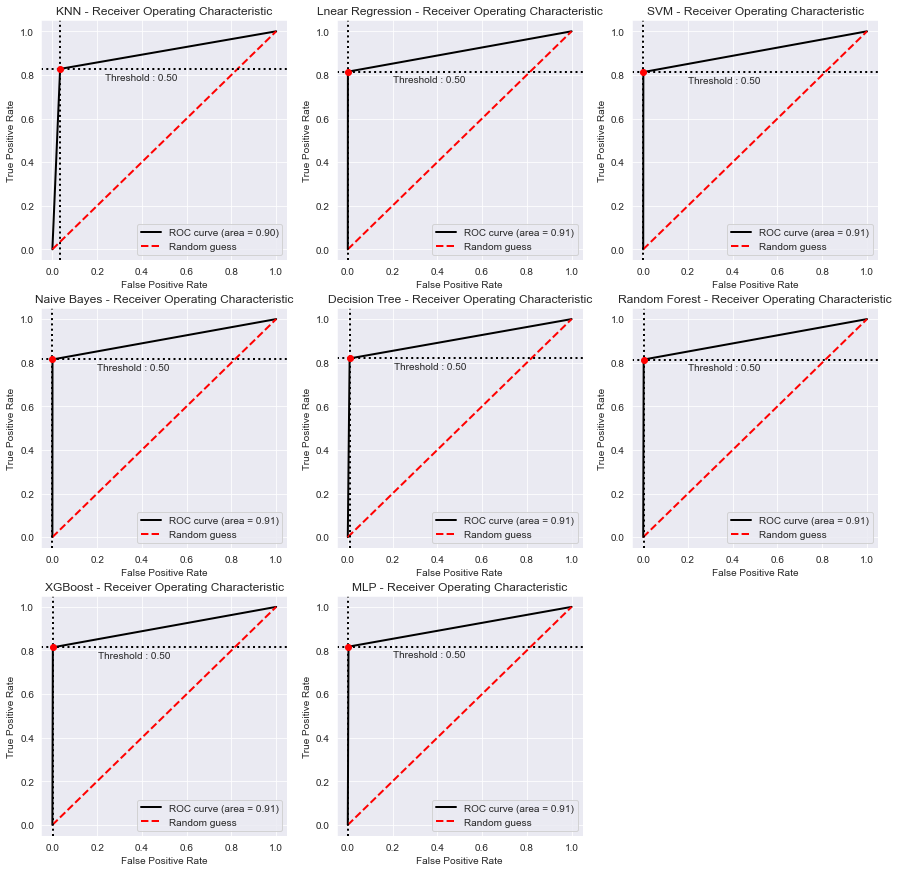

In [496]:
ax = plt.figure(figsize=(15,15))
ax.add_subplot(3,3,1)
bc1.plot_roc_curve( title='KNN - Receiver Operating Characteristic')
ax.add_subplot(3,3,2)
bc2.plot_roc_curve( title='Lnear Regression - Receiver Operating Characteristic')
ax.add_subplot(3,3,3)
bc3.plot_roc_curve( title='SVM - Receiver Operating Characteristic')
ax.add_subplot(3,3,4)
bc4.plot_roc_curve( title='Naive Bayes - Receiver Operating Characteristic')
ax.add_subplot(3,3,5)
bc5.plot_roc_curve( title='Decision Tree - Receiver Operating Characteristic')
ax.add_subplot(3,3,6)
bc6.plot_roc_curve( title='Random Forest - Receiver Operating Characteristic')
ax.add_subplot(3,3,7)
bc7.plot_roc_curve( title='XGBoost - Receiver Operating Characteristic')
ax.add_subplot(3,3,8)
bc8.plot_roc_curve( title='MLP - Receiver Operating Characteristic')

plt.show()

#### Conclusões:
   - Não identificado diferenças significativas entre os modelos selecionados
   - Random forest perfomou melhor tanto nas classificações corretas de classe 0 quanto classe 1.

### Voting

In [442]:
from sklearn.ensemble import VotingClassifier

In [443]:
voting_clf = VotingClassifier(estimators=[('KNN', knn_model), 
                                          ('RegLin', lr_model),
                                          ('SVM', svm_model),
                                          ('Naive Bayes', nb_model),
                                          ('tree', dt_model),
                                          ('RandomForest', rf_model),
                                          ('XGboost', xgb_model),
                                          ('MLP', mlp_model)], voting='hard') 
voting_clf.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('KNN',
                              Pipeline(steps=[('z-score', StandardScaler()),
                                              ('reduce_dim',
                                               PCA(n_components=2)),
                                              ('classify',
                                               KNeighborsClassifier(n_neighbors=2))])),
                             ('RegLin',
                              Pipeline(steps=[('z-score', StandardScaler()),
                                              ('reduce_dim',
                                               PCA(n_components=8)),
                                              ('classify',
                                               LogisticRegression(C=0.2))])),
                             ('SVM',
                              Pipeline(steps=[('z-score', StandardScaler()...
                                                             n_jobs=4,
                                       

In [444]:
cmtscore = voting_clf.score(X_test,y_test)
knnscore = knn_model.score(X_test,y_test)
lrscore = lr_model.score(X_test,y_test)
svmscore = svm_model.score(X_test,y_test)
NBscore = nb_model.score(X_test,y_test)
treescore = dt_model.score(X_test_tree,y_test_tree)
rfscore = rf_model.score(X_test,y_test)
xgbscore = xgb_model.score(X_test,y_test)
mlpscore = mlp_model.score(X_test,y_test)

print("Score do Comitê", cmtscore)
print("Score do KNN", knnscore)
print("Score da regressão linear", lrscore)
print("Score do SVM", svmscore)
print("Score do Naive Bayes", NBscore)
print("Score da arvore de decisao", treescore)
print("Score do random forest", rfscore)
print("Score do XGBoost", xgbscore)
print("Score do MLP", mlpscore)


Score do Comitê 0.9070505958752587
Score do KNN 0.8965246556768715
Score da regressão linear 0.9071933204881182
Score do SVM 0.9062299293513166
Score do Naive Bayes 0.9071933204881182
Score da arvore de decisao 0.9057303932063084
Score do random forest 0.9061942481981018
Score do XGBoost 0.9052308570613002
Score do MLP 0.907229001641333


#### Todos algorítmos apresentaram acurácias semelhantes, o comitê formado pela combinação de todos não melhorou a performance.

### Bagging

In [223]:
from sklearn.ensemble import BaggingClassifier

In [262]:
bagging_clf = BaggingClassifier(base_estimator=dt_model, n_estimators=4, random_state=10)

In [263]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=10),
                  n_estimators=4, random_state=10)

In [261]:
bagging_clf.score(X_test,y_test)

0.9046599586098623

#### Sem ganhos significativos na acurácia de cada algorítimo

### Boosting

In [296]:
from sklearn.ensemble import AdaBoostClassifier

In [304]:
boosting_clf = AdaBoostClassifier(n_estimators=100,random_state=25) 

In [305]:
boosting_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=25)

In [306]:
boosting_clf.score(X_test, y_test)

0.9073717262541925

#### Sem ganhos significativos na acurácia